In [1]:
import numpy as np
%pylab inline
import astropy.units as u
import biff
from pygadgetreader import *
from octopus import profiles
from octopus import leapfrog
from astropy import constants
import galpy.potential
import galpy.orbit as Orbit
import galpy

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [3]:
G1 = constants.G
G1 = G1.to(u.kpc**3/(u.Msun * u.Gyr**2))
print G1

4.49975332435e-06 kpc3 / (Gyr2 solMass)


In [4]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


In [5]:
MW = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pot', 'dm')

MWLMCf = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
MWLMCf_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
MWLMCf_pid = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')
MWLMCf_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'mass', 'dm')
MWLMCf_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pot', 'dm')

Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass
Returning DM    Potential


In [6]:
xmw_cm = 3.14213492468
ymw_cm = 33.1085245965
zmw_cm = -10.5106429199

In [7]:
MWLMCf[:,0] = MWLMCf[:,0] - xmw_cm
MWLMCf[:,1] = MWLMCf[:,1] - ymw_cm
MWLMCf[:,2] = MWLMCf[:,2] - zmw_cm

In [8]:
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]
trunc3 = np.where(np.sqrt((MWLMCf[:,0])**2.0 + (MWLMCf[:,1])**2.0 + (MWLMCf[:,2])**2.0)<500)[0]

In [9]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]

MWLMCf_t = MWLMCf[trunc3]
MWLMCf_mass_t = MWLMCf_mass[trunc3]
MWLMCf_pot_t = MWLMCf_pot[trunc3]

In [10]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

In [12]:
SLMCMW1, TLMCMW1, nlmsLMCMW1 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.85, 20, 20)


In [15]:
SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.85, 1, 0)
#MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, G_c.value, 1.55E12, 40.85)
#MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.55E12, 40.85)

In [16]:
t_hex1, x_hex1, y_hex1, z_hex1, vx_hex1, vy_hex1, vz_hex1 = leapfrog.integrate_biff(0, 10, 0, 161, 0, 0, 2, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex2, x_hex2, y_hex2, z_hex2, vx_hex2, vy_hex2, vz_hex2 = leapfrog.integrate_biff(0, 20, 0, 190, 0, 0, 2, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex3, x_hex3, y_hex3, z_hex3, vx_hex3, vy_hex3, vz_hex3 = leapfrog.integrate_biff(0, 50, 0, 201, 0, 0, 3, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex4, x_hex4, y_hex4, z_hex4, vx_hex4, vy_hex4, vz_hex4 = leapfrog.integrate_biff(0, 100, 0, 184, 0, 0, 4, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex5, x_hex5, y_hex5, z_hex5, vx_hex5, vy_hex5, vz_hex5 = leapfrog.integrate_biff(0, 200, 0, 152, 0, 0, 4, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)
t_hex6, x_hex6, y_hex6, z_hex6, vx_hex6, vy_hex6, vz_hex6 = leapfrog.integrate_biff(0, 400, 0, 117, 0, 0, 4, SMW1, TMW1, 1, 0, G1.value, 1.55E12, 40.85)

In [17]:
t_hex1_c, x_hex1_c, y_hex1_c, z_hex1_c, vx_hex1_c, vy_hex1_c, vz_hex1_c = leapfrog.integrate_biff(0, 10, 0, 161, 0, 0, 2, SLMCMW1, TLMCMW1, 20, 20, G1.value, 1.55E12, 40.85)
t_hex2_c, x_hex2_c, y_hex2_c, z_hex2_c, vx_hex2_c, vy_hex2_c, vz_hex2_c = leapfrog.integrate_biff(0, 20, 0, 190, 0, 0, 2, SLMCMW1, TLMCMW1, 20, 20, G1.value, 1.55E12, 40.85)
t_hex3_c, x_hex3_c, y_hex3_c, z_hex3_c, vx_hex3_c, vy_hex3_c, vz_hex3_c = leapfrog.integrate_biff(0, 50, 0, 201, 0, 0, 3, SLMCMW1, TLMCMW1, 20, 20, G1.value, 1.55E12, 40.85)
t_hex4_c, x_hex4_c, y_hex4_c, z_hex4_c, vx_hex4_c, vy_hex4_c, vz_hex4_c = leapfrog.integrate_biff(0, 100, 0, 184, 0, 0, 4, SLMCMW1, TLMCMW1, 20, 20, G1.value, 1.55E12, 40.85)
t_hex5_c, x_hex5_c, y_hex5_c, z_hex5_c, vx_hex5_c, vy_hex5_c, vz_hex5_c = leapfrog.integrate_biff(0, 200, 0, 152, 0, 0, 4, SLMCMW1, TLMCMW1, 20, 20, G1.value, 1.55E12, 40.85)
t_hex6_c, x_hex6_c, y_hex6_c, z_hex6_c, vx_hex6_c, vy_hex6_c, vz_hex6_c = leapfrog.integrate_biff(0, 400, 0, 117, 0, 0, 4, SLMCMW1, TLMCMW1, 20, 20, G1.value, 1.55E12, 40.85)

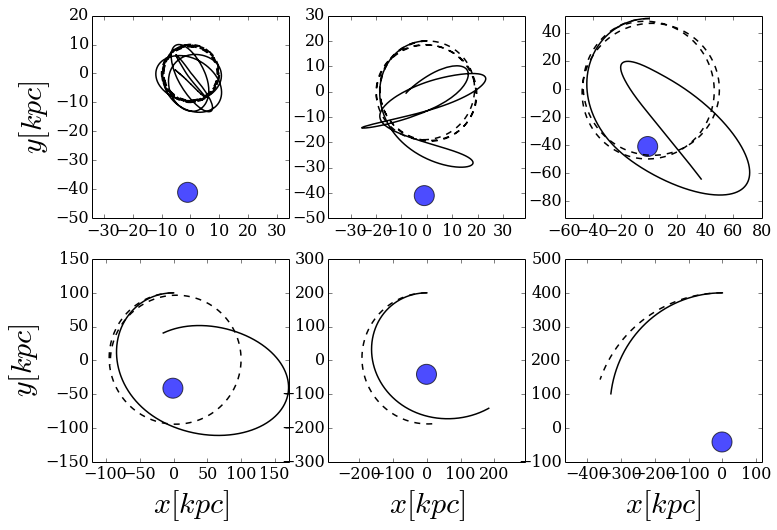

In [27]:
figure(figsize=(12, 8))

subplot(2, 3, 1)
plot(x_hex1, y_hex1, lw=1.5, c='k', ls='--')
plot(x_hex1_c, y_hex1_c, lw=1.5, c='k')
ylabel('$y[kpc]$', fontsize=30)
scatter(-1, -41, s=400, alpha=0.7)
axis('equal')

subplot(2, 3, 2)
plot(x_hex2, y_hex2, lw=1.5, c='k', ls='--')
plot(x_hex2_c, y_hex2_c, lw=1.5, c='k')
scatter(-1, -41, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 3)
plot(x_hex3, y_hex3, lw=1.5, c='k', ls='--')
plot(x_hex3_c, y_hex3_c, lw=1.5, c='k')
scatter(-1, -41, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 4)
plot(x_hex4, y_hex4, lw=1.5, c='k', ls='--')
plot(x_hex4_c, y_hex4_c, lw=1.5, c='k')
xlabel('$x[kpc]$', fontsize=30)
ylabel('$y[kpc]$', fontsize=30)
scatter(-1, -41, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 5)
plot(x_hex5, y_hex5, lw=1.5, c='k', ls='--')
plot(x_hex5_c, y_hex5_c, lw=1.5, c='k')
xlabel('$x[kpc]$', fontsize=30)
scatter(-1, -41, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 6)
plot(x_hex6, y_hex6, lw=1.5, c='k', ls='--')
plot(x_hex6_c, y_hex6_c, lw=1.5, c='k')
scatter(-1, -41, s=400, alpha=0.7)

xlabel('$x[kpc]$', fontsize=30)
axis('equal')

plt.savefig('MWLMC_xy_orbits_biffn20n20.png', dpi=300, bbox_inches='tight')

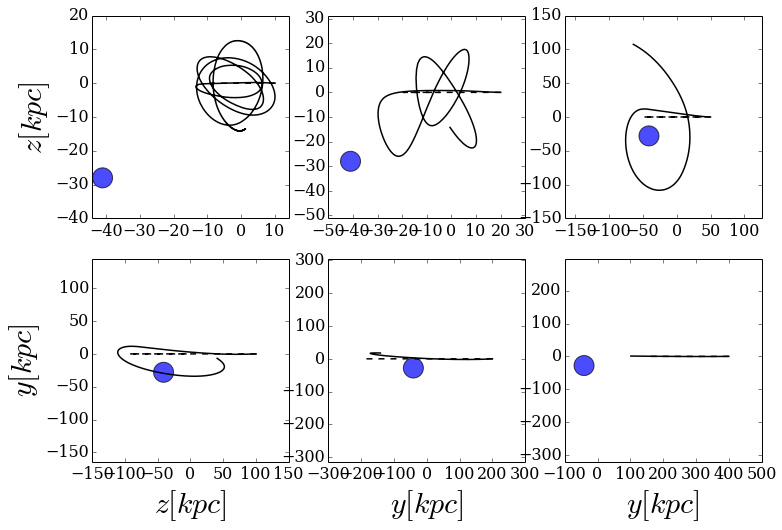

In [28]:
figure(figsize=(12, 8))

subplot(2, 3, 1)
plot(y_hex1, z_hex1, lw=1.5, c='k', ls='--')
plot(y_hex1_c, z_hex1_c, lw=1.5, c='k')
ylabel('$z[kpc]$', fontsize=30)
scatter(-41, -28, s=400, alpha=0.7)
axis('equal')

subplot(2, 3, 2)
plot(y_hex2, z_hex2, lw=1.5, c='k', ls='--')
plot(y_hex2_c, z_hex2_c, lw=1.5, c='k')
scatter(-41, -28, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 3)
plot(y_hex3, z_hex3, lw=1.5, c='k', ls='--')
plot(y_hex3_c, z_hex3_c, lw=1.5, c='k')
scatter(-41, -28, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 4)
plot(y_hex4, z_hex4, lw=1.5, c='k', ls='--')
plot(y_hex4_c, z_hex4_c, lw=1.5, c='k')
xlabel('$z[kpc]$', fontsize=30)
ylabel('$y[kpc]$', fontsize=30)
scatter(-41, -28, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 5)
plot(y_hex5, z_hex5, lw=1.5, c='k', ls='--')
plot(y_hex5_c, z_hex5_c, lw=1.5, c='k')
xlabel('$y[kpc]$', fontsize=30)
scatter(-41, -28, s=400, alpha=0.7)

axis('equal')

subplot(2, 3, 6)
plot(y_hex6, z_hex6, lw=1.5, c='k', ls='--')
plot(y_hex6_c, z_hex6_c, lw=1.5, c='k')
scatter(-41, -28, s=400, alpha=0.7)

xlabel('$y[kpc]$', fontsize=30)
axis('equal')

plt.savefig('MWLMC_yz_orbits_biffn20n20.png', dpi=300, bbox_inches='tight')